# Prepare data

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

from preparation import prepare_data, select_by_date_interval
from plotting import bar_plot_videos_per_h, get_videos_per_h_series

In [34]:
plt.rcParams['figure.dpi'] = 150 # make your graphs bigger
style.use('seaborn') # apply style for your plot. Hard to read letters in pie charts if style isn't suitable

In [35]:
PATH = "C:/Users/San/Documents/CS projects/yt_activity_analysis/data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df_full = prepare_data(PATH)

start_date = "2022-07-15"
end_date = "2022-08-30"
df = select_by_date_interval(df_full, start=start_date)
df

,video_title,channel_name,time
0,Mount & Blade theme soundtrack,xXxPrimoPOLxXx,2022-08-29 13:28:13.769000+03:00
1,Main Title (Theme from Mount and Blade),"J. S. Hopkins, J. S. Hopkins - Topic",2022-08-29 13:26:37.150000+03:00
2,Main Theme - Mount & Blade Floris Expanded Sou...,Kong,2022-08-29 13:26:25.766000+03:00
3,Mount and Blade Soundtrack - Swadian Hall,F33bs,2022-08-29 13:26:08.036000+03:00
4,Mount&Blade music main theme,-PolishViking77-,2022-08-29 13:24:40.996000+03:00
...,...,...,...
2442,Kozak System НА#УЙ МАНІФЕСТ F#CK OFF MANIFEST,Hunta TV,2022-07-01 11:05:56.036000+03:00
2443,How NOT to learn Python for Data Science,Luke Barousse,2022-07-01 11:05:30.394000+03:00
2444,Russia's Catastrophic Oil & Gas Problem,RealLifeLore,2022-07-01 02:38:10.376000+03:00
2445,Why War in Ukraine is Causing Apocalyptic Famine,RealLifeLore,2022-07-01 02:15:43.363000+03:00


# Count on how many videos you clicked per channel

In [36]:
counts = df["channel_name"].value_counts()
counts

Viva La Dirt League            79
STERNENKO                      67
Speak The Truth                48
Історія Без Міфів              47
gameranx                       40
                               ..
U.S. Air Force Recruiting       1
SneakySquidGames                1
Military Forces XXI Century     1
VSB defense                     1
HistoryLegends                  1
Name: channel_name, Length: 757, dtype: Int64

# Break into categories

In [37]:
bins = [0, 1, 5, 10, 20, 50, np.inf]
names = ['1', '2-5', '6-10', '11-20', '21-50', ">50"]

intervals = pd.cut(counts, bins, labels=names)

df2 = pd.DataFrame({"video_count": counts, "interval": intervals})
df2

,video_count,interval
Viva La Dirt League,79,>50
STERNENKO,67,>50
Speak The Truth,48,21-50
Історія Без Міфів,47,21-50
gameranx,40,21-50
...,...,...
U.S. Air Force Recruiting,1,1
SneakySquidGames,1,1
Military Forces XXI Century,1,1
VSB defense,1,1


# Plot percentage of categories

In [38]:
interval_count = df2["interval"].value_counts()
percentage = interval_count/len(df2)
percentage

1        0.623514
2-5      0.240423
6-10     0.073976
11-20    0.039630
21-50    0.019815
>50      0.002642
Name: interval, dtype: float64

<AxesSubplot:ylabel='interval'>

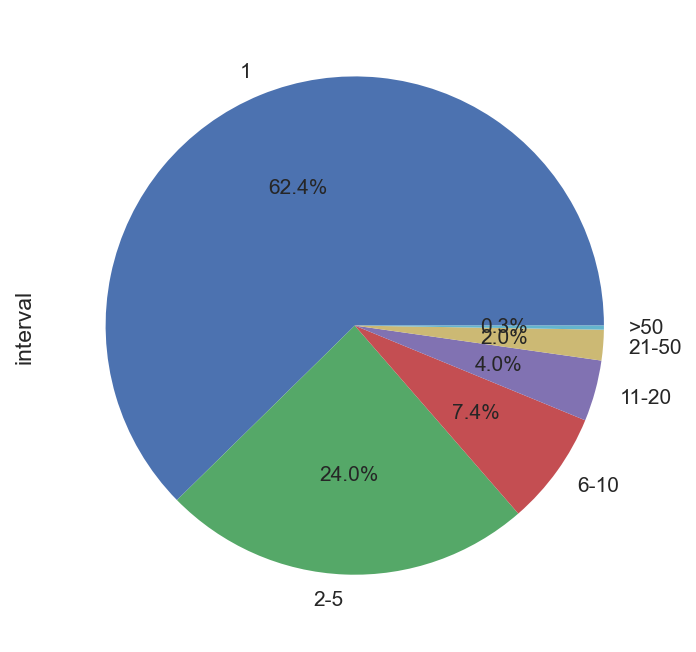

In [39]:
percentage.plot.pie(autopct='%1.1f%%')

# Plot n most watched channels

743

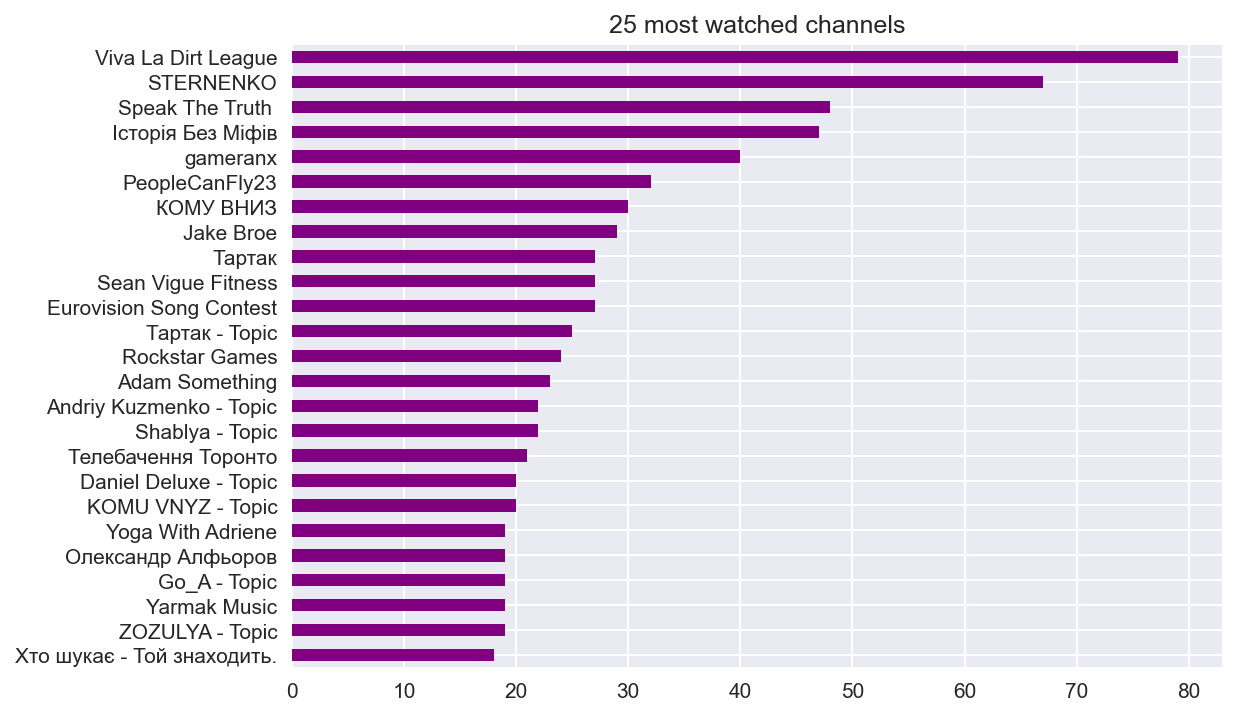

In [40]:
n = 25
top_n_channels = counts.iloc[:n]
ax = top_n_channels.plot(kind="barh", color="purple", title=f"{n} most watched channels")
ax.invert_yaxis()
sum(top_n_channels)

In [41]:
top_n_channels/sum(top_n_channels)

Viva La Dirt League           0.106326
STERNENKO                     0.090175
Speak The Truth               0.064603
Історія Без Міфів             0.063257
gameranx                      0.053836
PeopleCanFly23                0.043069
КОМУ ВНИЗ                     0.040377
Jake Broe                     0.039031
Тартак                        0.036339
Sean Vigue Fitness            0.036339
Eurovision Song Contest       0.036339
Тартак - Topic                0.033647
Rockstar Games                0.032301
Adam Something                0.030956
Andriy Kuzmenko - Topic        0.02961
Shablya - Topic                0.02961
Телебачення Торонто           0.028264
Daniel Deluxe - Topic         0.026918
KOMU VNYZ - Topic             0.026918
Yoga With Adriene             0.025572
Олександр Алфьоров            0.025572
Go_A - Topic                  0.025572
Yarmak Music                  0.025572
ZOZULYA - Topic               0.025572
Хто шукає - Той знаходить.    0.024226
Name: channel_name, dtype

In [42]:
top_n_channels/sum(counts)

Viva La Dirt League           0.032284
STERNENKO                      0.02738
Speak The Truth               0.019616
Історія Без Міфів             0.019207
gameranx                      0.016347
PeopleCanFly23                0.013077
КОМУ ВНИЗ                      0.01226
Jake Broe                     0.011851
Тартак                        0.011034
Sean Vigue Fitness            0.011034
Eurovision Song Contest       0.011034
Тартак - Topic                0.010217
Rockstar Games                0.009808
Adam Something                0.009399
Andriy Kuzmenko - Topic       0.008991
Shablya - Topic               0.008991
Телебачення Торонто           0.008582
Daniel Deluxe - Topic         0.008173
KOMU VNYZ - Topic             0.008173
Yoga With Adriene             0.007765
Олександр Алфьоров            0.007765
Go_A - Topic                  0.007765
Yarmak Music                  0.007765
ZOZULYA - Topic               0.007765
Хто шукає - Той знаходить.    0.007356
Name: channel_name, dtype

In [43]:
top_n_channels

Viva La Dirt League           79
STERNENKO                     67
Speak The Truth               48
Історія Без Міфів             47
gameranx                      40
PeopleCanFly23                32
КОМУ ВНИЗ                     30
Jake Broe                     29
Тартак                        27
Sean Vigue Fitness            27
Eurovision Song Contest       27
Тартак - Topic                25
Rockstar Games                24
Adam Something                23
Andriy Kuzmenko - Topic       22
Shablya - Topic               22
Телебачення Торонто           21
Daniel Deluxe - Topic         20
KOMU VNYZ - Topic             20
Yoga With Adriene             19
Олександр Алфьоров            19
Go_A - Topic                  19
Yarmak Music                  19
ZOZULYA - Topic               19
Хто шукає - Той знаходить.    18
Name: channel_name, dtype: Int64

# Count on how many videos you clicked per hour

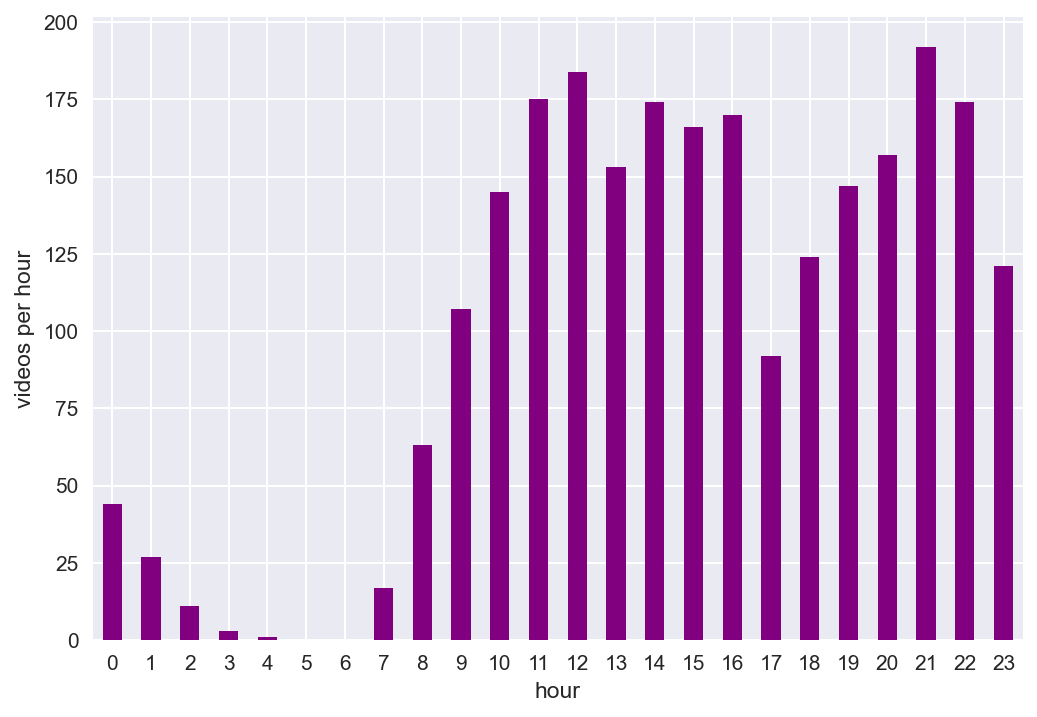

In [44]:
bar_plot_videos_per_h(df)

# Discover at what hours you watch a particular channel 

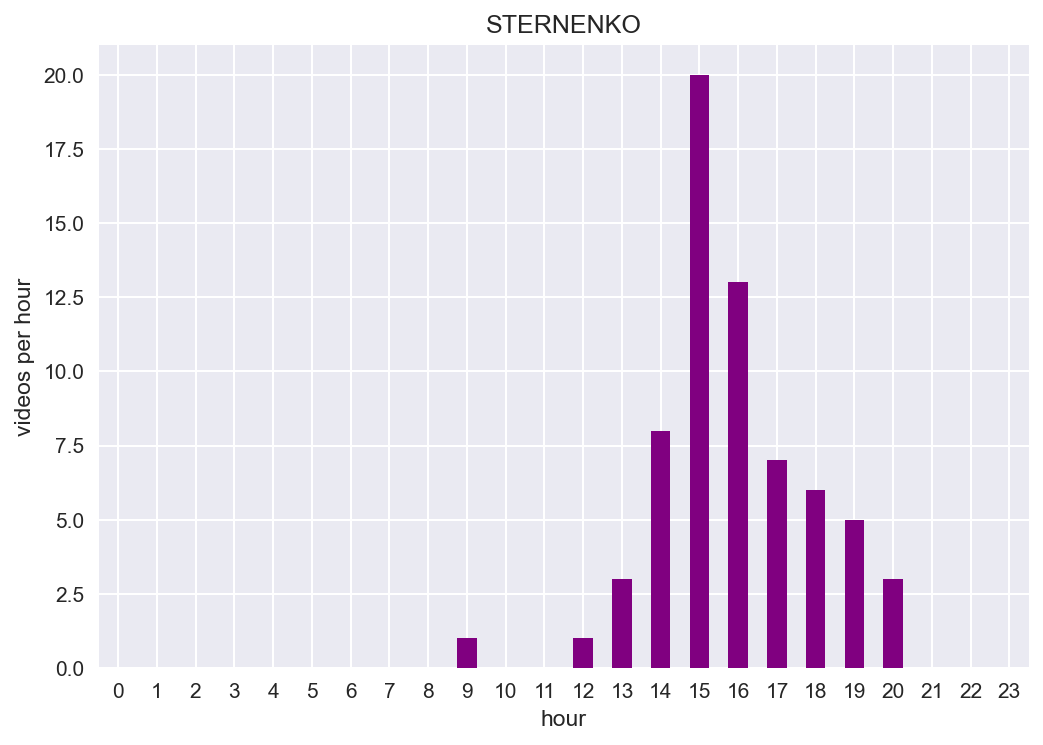

In [45]:
channel_name_to_look = "STERNENKO"
bar_plot_videos_per_h(df, channel_name_to_look)

# Plot videos count per hour for several channels

In [46]:
list_top_n_channels = top_n_channels.index.to_list()
list_top_n_channels

['Viva La Dirt League',
 'STERNENKO',
 'Speak The Truth ',
 'Історія Без Міфів',
 'gameranx',
 'PeopleCanFly23',
 'КОМУ ВНИЗ',
 'Jake Broe',
 'Тартак',
 'Sean Vigue Fitness',
 'Eurovision Song Contest',
 'Тартак - Topic',
 'Rockstar Games',
 'Adam Something',
 'Andriy Kuzmenko - Topic',
 'Shablya - Topic',
 'Телебачення Торонто',
 'Daniel Deluxe - Topic',
 'KOMU VNYZ - Topic',
 'Yoga With Adriene',
 'Олександр Алфьоров',
 'Go_A - Topic',
 'Yarmak Music',
 'ZOZULYA - Topic',
 'Хто шукає - Той знаходить.']

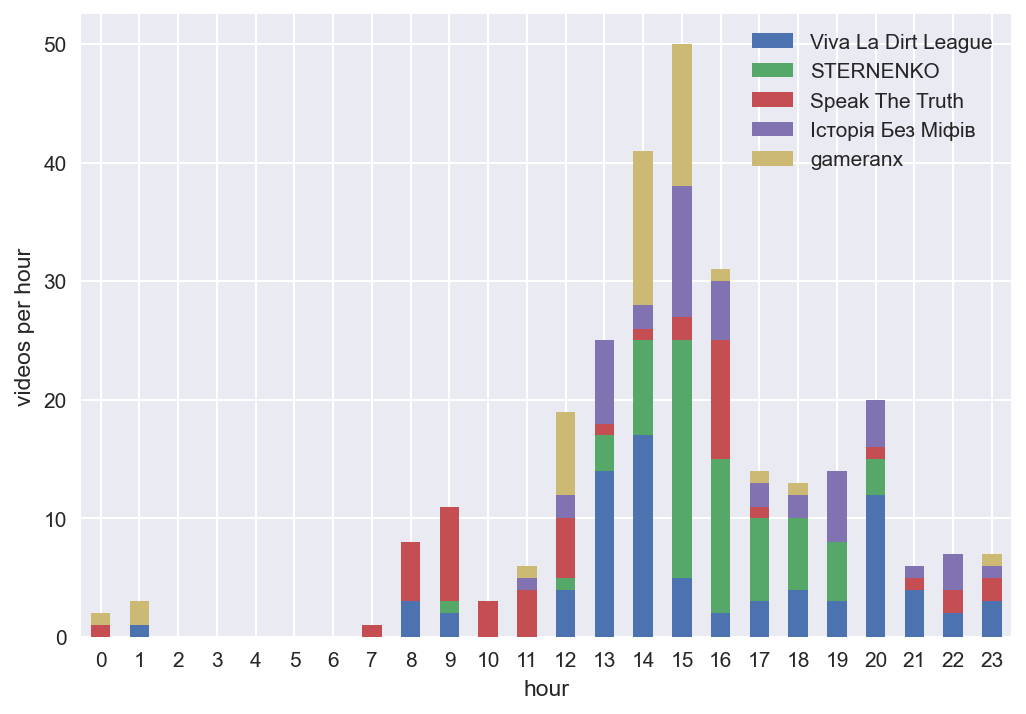

In [47]:
start_point = 0
interval = 5
end_point = start_point + interval

df_data = {f"{list_top_n_channels[start_point]}": get_videos_per_h_series(
    df, list_top_n_channels[start_point])}
df_top_n_channels = pd.DataFrame(data=df_data)
for i in range(start_point+1, end_point):
    df_top_n_channels[list_top_n_channels[i]] = get_videos_per_h_series(
        df, list_top_n_channels[i])
df_top_n_channels
df_top_n_channels.plot.bar(stacked=True, rot=0,
                           xlabel="hour", ylabel="videos per hour").legend(bbox_to_anchor=(1,1))

# Count how many videos you click per day of week

C:\Users\San\AppData\Local\Temp\ipykernel_11448\267179306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['time'].dt.strftime('%a')


<AxesSubplot:>

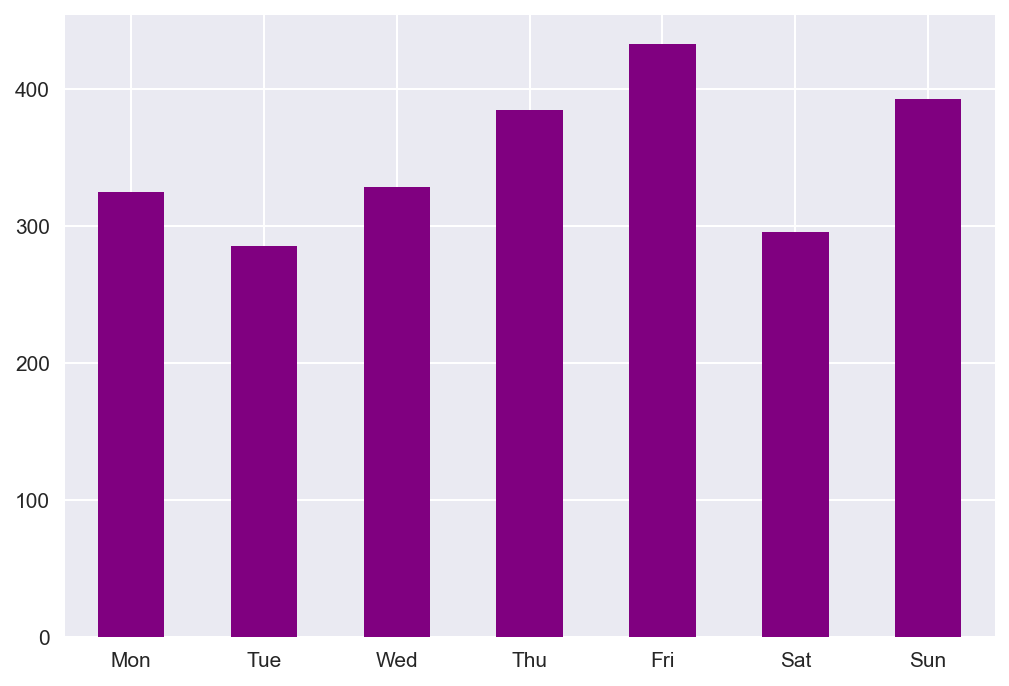

In [48]:
df['weekday'] = df['time'].dt.strftime('%a')
total = len(df["weekday"])
str_week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
videos_per_weekday = df["weekday"].value_counts()[str_week_days] # sort with custom index
videos_per_weekday.plot.bar(color="purple", rot=0)